# CIDS Carpentries Workshop - Day 1 - Part 3

This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/index.html) lesson.

---
## How to use a Jupyter Notebook
Online Resources:
- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- https://code.visualstudio.com/docs/datascience/jupyter-notebooks 

Useful Tips:
- To save the notebook/file, <kbd>ctrl</kbd> + <kbd>s</kbd> or Go to `File -> Save`.
- You run a cell with <kbd>shift</kbd> + <kbd>enter</kbd> or
    - **Jupyter Notebook, JupyterLab**: you can use the run button ▶ in the tool bar.
    - **VScode**: you can use the run button ▶ in front of the cell.
- If you run a cell with <kbd>option (alt)</kbd> + <kbd>enter</kbd> it will also create a new cell below.
- If you opened this a classic notebook you can check *Help > Keyboard Shortcuts* else see the *Cheatsheet* for more info.
- If you are using VScode, See [Jupyter Notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) for more info.
- The notebook has different type of cells (Code and Markdown are most commonly used): 
    - **Code** cells expect code for the Kernel you have chosen, syntax highlighting is available, comments in the code are specified with `#` -> code after this will not be executed.
    - **Markdown** cells allow you to right report style text, using markdown for formatting the style (e.g. Headers, bold face etc).
---

## ❓Questions and Objectives for this Notebook
What should you be able to answer by the end of this notebook?
### Questions
- How can I access specific data within my data set?
- How can Python and Pandas help me to analyse my data?

### Objectives
- Describe what 0-based indexing is.
- Manipulate and extract data using column headings and index locations.
- Employ slicing to select sets of data from a DataFrame.
- Employ label and integer-based indexing to select ranges of data in a dataframe.
- Reassign values within subsets of a DataFrame.
- Create a copy of a DataFrame.
- Query / select a subset of data using a set of criteria using the following operators: ==, !=, >, <, >=, <=.
- Locate subsets of data using masks.
- Describe BOOLEAN objects in Python and manipulate data using BOOLEANs.
---

## Loading our Data
We will continue to use the surveys dataset that we worked with in the last episode. Let's reopen and read in the data again:

In [1]:
# Make sure pandas is loaded
import pandas as pd

# Read in the survey CSV
surveys_df = pd.read_csv("../data/surveys.csv")

---

## Indexing and Slicing in Python
We often want to work with subsets of a **DataFrame** object. There are different ways to accomplish this including: using labels (column headings), numeric ranges, or specific x,y index locations.

### Selecting Data using Labels
We use square brackets `[]` to select a subset of a Python object. For example, we can select all data from a column named `species_id` from the `surveys_df` DataFrame by name. There are two ways to do this.

In [2]:
# TIP: use the .head() method to only see the first few rows of the dataframe
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [3]:
# Method 1: Select a 'subset' of the data using the column name
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [4]:
# Method 2: Use the column name as an 'attribute'
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

We can also create a new object that contains only the data within the `species_id` column as follows:

In [5]:
# Create an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

We can pass a list of column names too, as an index to select columns in that order. This is useful when we need to reorganise our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception (error) will be raised.

In [6]:
# Select the species and plot_id columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


In [7]:
# What happens if we flip the order?
surveys_df[['plot_id', 'species_id']]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
...,...,...
35544,15,AH
35545,15,AH
35546,10,RM
35547,7,DO


In [8]:
# What happens if you ask for a column that doesn't exist?
surveys_df['speciess']

KeyError: 'speciess'

Python tells us what type of error it is in the traceback, at the bottom it says KeyError: 'speciess' which means that speciess is not a valid column name (nor a valid key in the related Python data type dictionary).

---

### Extracting Ranged based Subsets: Slicing
#### 🔔 **REMINDER**:

The Python language and its modules (such as Pandas) define reserved words that should not be used as identifiers when assigning objects and variable names. Examples of reserved words in Python include Boolean values `True` and `False`, operators `and`, `or`, and `not`, among others. The full list of reserved words for Python version 3 is provided at https://docs.python.org/3/reference/lexical_analysis.html#identifiers.  
 
When naming objects and variables, it’s also important to avoid using the names of built-in data structures and methods. For example, a list is a built-in data type. It is possible to use the word ‘list’ as an identifier for a new object, for example `list = ['apples', 'oranges', 'bananas']`. However, you would then be unable to create an empty list using `list()` or convert a tuple to a list using `list(sometuple)`.

Instead, use more descriptive variable names, such as `fruit_list = ['apples', 'oranges', 'bananas']`


---

#### 🔔 **REMINDER**: Python uses 0-based indexing.

Let's remind ourselves that Python uses 0-based indexing. This means that the first element in an object is located at position `0`. This is different from other tools like R and Matlab that index elements within objects starting at 1.

![indexing diagram](https://datacarpentry.org/python-ecology-lesson/fig/slicing-indexing.png)

![slicing diagram](https://datacarpentry.org/python-ecology-lesson/fig/slicing-slicing.png)

In [9]:
# Create a list of numbers
a = [1, 2, 3, 4, 5]

#### ✏️ Challenge
1. What value does the code `a[0]` return?
2. How about `a[5]`?
3. Why did `a[5]` above return an error?
4. What about `a[len(a)]`?

In [10]:
# 1
a[0]

1

In [11]:
# 2
a[5]

IndexError: list index out of range

In [12]:
# 4
a[len(a)]

IndexError: list index out of range

---

### Slicing Subsets of Rows in Python
Slicing using the `[]` operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax `data[start:stop]`. When slicing in Pandas, the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. So if you want to select rows 0, 1 and 2; your code would look like this.

In [13]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


The stop bound in Python is different from what you might be used to in languages like Matlab and R.

In [14]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [15]:
# Select the last row
surveys_df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


We can also reassign values within subsets of our DataFrame.

But before we do that, let's look at the difference between the concept of copying objects and the concept of referencing objects in Python.

---

### Copying Objects vs Referencing Objects in Python
Let's start with an example:


In [16]:
# Using the `copy()` method
true_copy_surveys_df = surveys_df.copy()

In [17]:
# Using the `=` operator
ref_surveys_df = surveys_df

We might have thought that the code `ref_surveys_df = surveys_df` creates a fresh distinct copy of the `surveys_df` DataFrame object. However, using the `=` operator in the simple statement `y = x` does **not** create a copy of our DataFrame. Instead `y = x` creates a variable `y` that references the **same** object that `x` refers to.

To state this another way, there is only **one** object (the DataFrame), and both `x` and `y` refer to it.

In contrast, the `copy()` method for a DataFrame creates a true copy of the DataFrame.
Let's look at what happens when we reassign the values within a subset of that DataFrame that references another DataFrame object.

In [18]:
# Assign the value `0` to the first three rows of data in the DataFrame
ref_surveys_df[0:3] = 0

In [19]:
# Let's look at the reference DataFrame
ref_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [20]:
# Let's look at the original DataFrame
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


When we assigned the first 3 rows the value of `0` using the `ref_surveys_df` DataFrame, the `surveys_df` DataFrame is modified too. Remember, we created the reference `ref_surveys_df` object above when we did `ref_surveys_df = surveys_df`. 

Remember `surveys_df` and `ref_surveys_df` refer to the same exact DataFrame object. If either one changes the object, the other will see the same changes to the reference object.

In [21]:
# Let's look at the copy DataFrame
true_copy_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


Okay, that's enough of that. Let's create a brand new clean dataframe from the original data CSV file.

In [22]:
surveys_df = pd.read_csv("../data/surveys.csv")

---

### Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.
- `loc`: *label* based indexing where you can refer to rows and columns by their name (which can be integers)
- `iloc`: *integer* based indexing counting from 0


To select a subset of rows **and** columns from our DataFrame, we can use the `iloc` method. For example, we can select month, day and year (columns 1, 2 and 3 if we start counting at 0), like this:

In [23]:
# Let's look at the dataframe
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [24]:
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you ask for 0:3, you are actually telling Python to start at index 0 and select rows 0, 1, 2 **up to but not including 3.**

Let's explore some other ways to index and select subsets of data:

In [25]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [26]:
# Select using column names
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [27]:
# Selecting out of bounds
surveys_df.loc[[0, 10, 35549], :]

KeyError: '[35549] not in index'

**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`. With `loc`, both the start bound and the stop bound are **inclusive**. When using `loc`, integers *can* be used, but the integers refer to the index label and not the position.  For example, using `loc` and selecting 1:4 will get a different result than using `iloc` to select rows 1:4.

In [28]:
# Using `loc`
surveys_df.loc[1, 4]

KeyError: 4

In [29]:
# Using `iloc`
surveys_df.iloc[1, 4]

3

We can also select a specific data value using a row and column location within the DataFrame and `iloc` indexing:

In [30]:
# dat.iloc[row, column]

surveys_df.iloc[2, 6]

'F'

Remember that Python indexing begins at 0. So, the index location [2,6] selects the element that is 3 rows down and 7 columns over in the DataFrame.

### ✏️ Challenge
1. What happens when you execute the following:
    - `surveys_df[0:1]`
    - `surveys_df[0]`
    - `surveys_df[:4]`
    - `surveys_df[:-4]`
2. What happens when you call:
    - `surveys_df.iloc[0:1]`
    - `surveys_df.iloc[0]`
    - `surveys_df.iloc[:4, :]`
    - `surveys_df.iloc[0:4, 1:4]`
    - `surveys_df.loc[0:4, 1:4]`

How are the two sets of commands different?

In [31]:
# 1a
surveys_df[0:1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [32]:
# 1b
surveys_df[0]

KeyError: 0

In [33]:
# 1c
surveys_df[0:4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [34]:
# 1d
surveys_df[:-4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35543,35544,12,31,2002,15,US,NaN,NaN,NaN


In [35]:
# 2a
surveys_df.iloc[0:1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [36]:
# 2b
surveys_df.iloc[0]

record_id             1
month                 7
day                  16
year               1977
plot_id               2
species_id           NL
sex                   M
hindfoot_length    32.0
weight              NaN
Name: 0, dtype: object

In [37]:
# 2c
surveys_df.iloc[:4, :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [38]:
# 2d
surveys_df.iloc[0:4, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


In [39]:
# 2e
surveys_df.loc[0:4, 1:4]

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

---

### Subsetting Data using Criteria
We can also select a subset of our data using criteria. For example, we can select all rows that have a year value of 2002:

In [40]:
# Selecting rows where the year is 2002
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


Or we can select all rows that do not contain the year 2002:

In [41]:
# Selecting rows where the year is not 2002
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


We can define sets of criteria too:

In [42]:
# Selecting rows where the year is between 1980 and 1985
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0
11223,11224,12,8,1985,11,DM,M,37.0,49.0
11224,11225,12,8,1985,7,PE,M,20.0,18.0
11225,11226,12,8,1985,1,DM,M,38.0,47.0


### Python Syntax Cheat Sheet

We can use the syntax below when querying data by criteria from a DataFrame:
- Equals `==`
- Not equals: `!=`
- Greater than, less than: `>` or `<`
- Greater than or equal to `>=`
- Less than or equal to `<=`

### ✏️ Challenge - Queries
1. Select a subset of rows in the surveys_df DataFrame that contain data from the year 1999 and that contain weight values less than or equal to 8. How many rows did you end up with? What did your neighbor get?

2. You can use the isin command in Python to query a DataFrame based upon a list of values as follows:
```py
surveys_df[surveys_df['species_id'].isin([listGoesHere])]
```

3. Experiment with other queries. Create a query that finds all rows with a weight value greater than or equal to 0.

4. The ~ symbol in Python can be used to return the OPPOSITE of the selection that you specify. It is equivalent to is not in. Write a query that selects all rows with sex NOT equal to ‘M’ or ‘F’ in the “surveys” data.

In [43]:
# 1 
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

# If you are only interested in how many rows meet the criteria, the sum of True values could be used instead:
# sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)) 

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [44]:
# 2
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique()

#  How many unique outputs?
#  surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique().shape

array([ 1, 10,  6, 24,  2, 23, 19, 12, 20, 22,  3,  9, 14, 13, 21,  7, 11,
       15,  4, 16, 17,  8, 18,  5])

In [45]:
# 3
surveys_df[surveys_df["weight"] >= 0]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [46]:
# 4
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35527,35528,12,31,2002,13,US,NaN,NaN,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


---

### Using masks to identify a specific condition
A **mask** can be useful to locate where a particular subset of values exist or don't exist - for example, NaN, or "Not a Number" values. To understand masks, we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example:

In [47]:
# Set x to 5
x = 5

In [48]:
# What does the code below return?
x > 5

False

In [49]:
# How about this?
x == 5

True

We can ask Python whether `x` is greater than 5, it returns `False`. This is Python's way to say "No". Indeed, the value of `x` is 5, and 5 is not greater than 5.

To create a boolean mask:
- Set the True / False criteria (e.g. `values > 5 = True`)
- Python will then assess each value in the object to determine whether the value meets the criteria (True) or not (False)
- Python creates an output object that is the same shape as the original object, but with a `True` or `False` for each index location.

Let's try this out. Let's identify all locations in the survey data that have null (missing or NaN) data values. We can use the `isnull` method to do this. The `isnull` method will compare each cell with a null value. If an element has a null value, it will be assigned a value of `True` in the output object.

In [50]:
# Mask of null values
pd.isnull(surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True
35545,False,False,False,False,False,False,True,True,True
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


To select the rows where there are null values, we can use the mask as an index to subset our data as follows:

In [51]:
# Selecting rows with NaN values with the `any()` method
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35530,35531,12,31,2002,13,PB,F,27.0,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


Note that the `weight` column of our DataFrame contains many `null` or `NaN` values. We will explore ways of dealing with this in the next episode on [Data Types and Formats](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/index.html).

We can run `isnull` on a particular column too. What does the code below do?

In [52]:
# What does this do?
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']
print(empty_weights)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
35530   NaN
35543   NaN
35544   NaN
35545   NaN
35548   NaN
Name: weight, Length: 3266, dtype: float64


Let's take a minute to look at the statement above. We are using the Boolean object `pd.isnull(surveys_df['weight'])` as an index to `surveys_df`. We are asking Python to select rows that have a `NaN` value of weight.

#### 🔥 Challenge - Putting it all together
1. Create a new DataFrame that only contains observations with sex values that are not female or male. Print the number of rows in this new DataFrame. Verify the result by comparing the number of rows in the new DataFrame with the number of rows in the surveys DataFrame where sex is null.


2. Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0. Create a stacked bar plot of average weight by plot with male vs female values stacked for each plot.

In [53]:
# 1
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
print(len(new))

# What about this?
# sum(surveys_df['sex'].isnull()) == len(new)

2511


<Axes: xlabel='plot_id'>

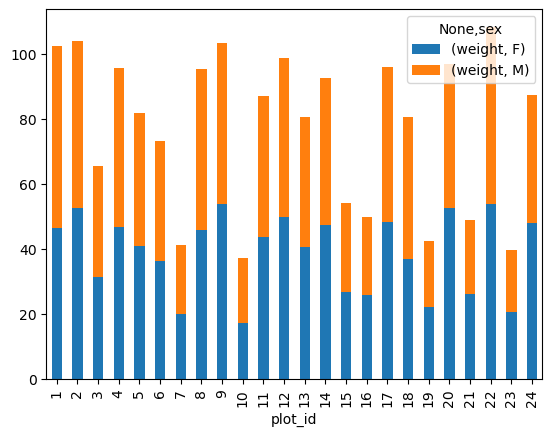

In [54]:
# 2

# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
              surveys_df["weight"] > 0.][["sex", "weight", "plot_id"]]
# calculate the mean weight for each plot id and sex combination:
stack_selection = stack_selection.groupby(["plot_id", "sex"]).mean().unstack()
# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)

---

# ❗Key Points
- In Python, portions of data can be accessed using indices, slices, column headings, and condition-based subsetting.
- Python uses 0-based indexing, in which the first element in a list, tuple or any other data structure has an index of 0.
- Pandas enables common data exploration steps such as data indexing, slicing and conditional subsetting.